<a href="https://colab.research.google.com/github/nromano2/CS430_InClassAssignments/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
#Data Handling Libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Data Model Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Evaluation Libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?  
- 15 columns, 891 rows

In [ ]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?  
Columns with Missing Values:
- age
- embarked
- deck
- embark_town

In [ ]:
for colname in titanic.columns:
    print(f"{colname.rjust(11)}: {titanic[colname].isna().sum()}")

   survived: 0
     pclass: 0
        sex: 0
        age: 177
      sibsp: 0
      parch: 0
       fare: 0
   embarked: 2
      class: 0
        who: 0
 adult_male: 0
       deck: 688
embark_town: 2
      alive: 0
      alone: 0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

[Text(0.5, 1.0, 'Age Distribution')]

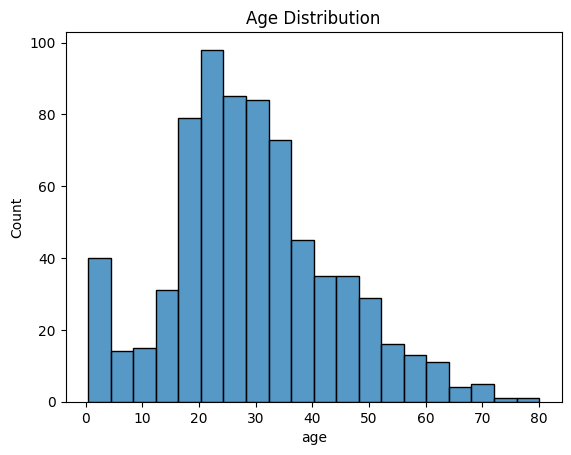

In [ ]:
sns.histplot(titanic['age']).set(title='Age Distribution')

[Text(0.5, 1.0, 'Fare Distribution')]

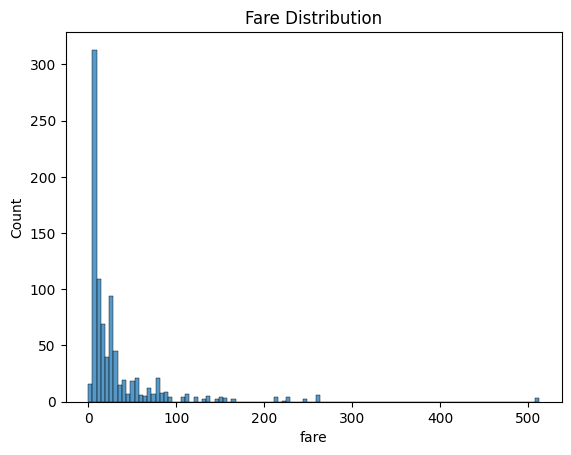

In [ ]:
sns.histplot(titanic['fare']).set(title='Fare Distribution')

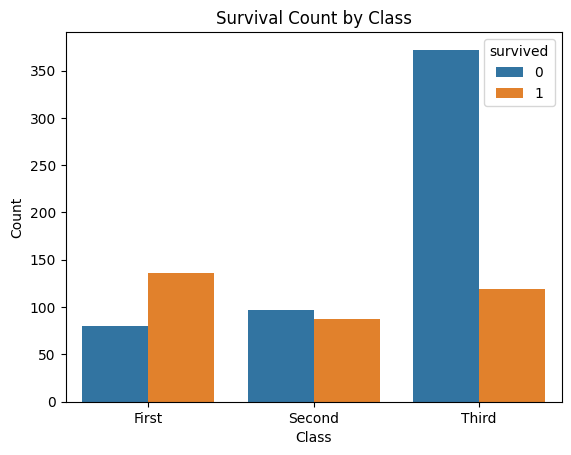

In [ ]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.7877094972067039

Model: Logistic Regression
Accuracy: 0.7988826815642458

Model: Decision Tree
Accuracy: 0.7597765363128491

Model: Random Forest
Accuracy: 0.7821229050279329

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7877094972067039

Model: Gradient Boosting
Accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
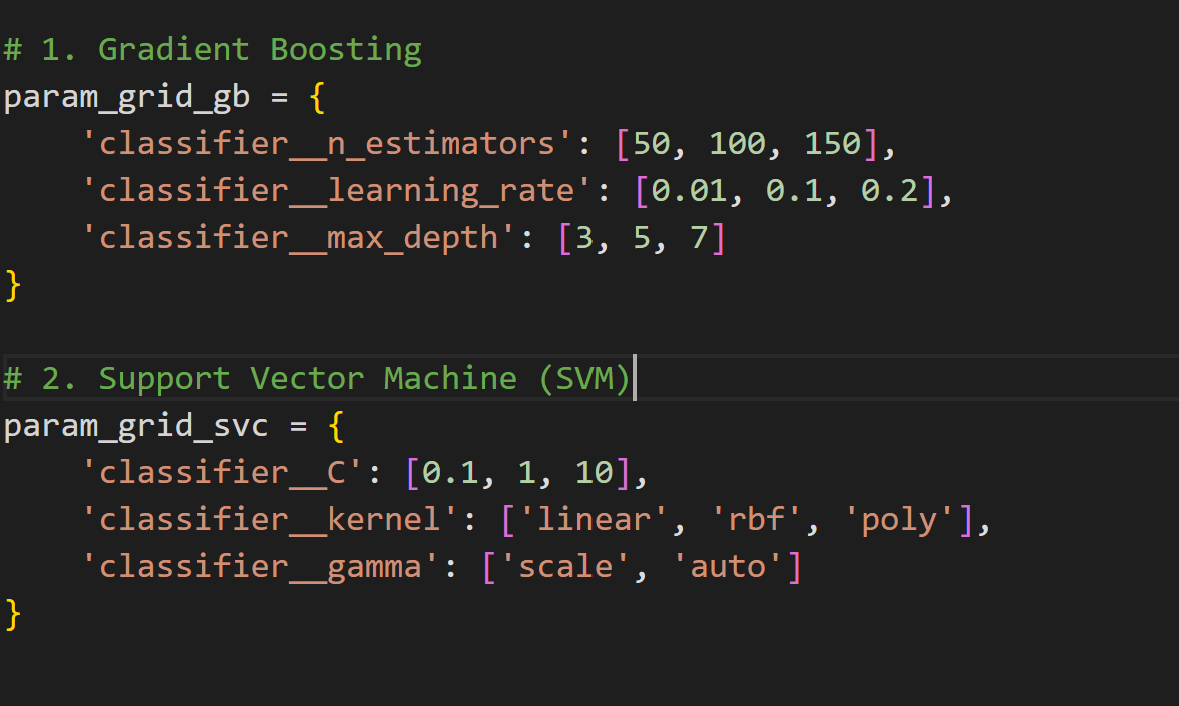

In [ ]:
param_gird_gradient_boosting = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
}

param_gird_support_vector = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto'],
}

## List of models and their corresponding parameter grids
Example
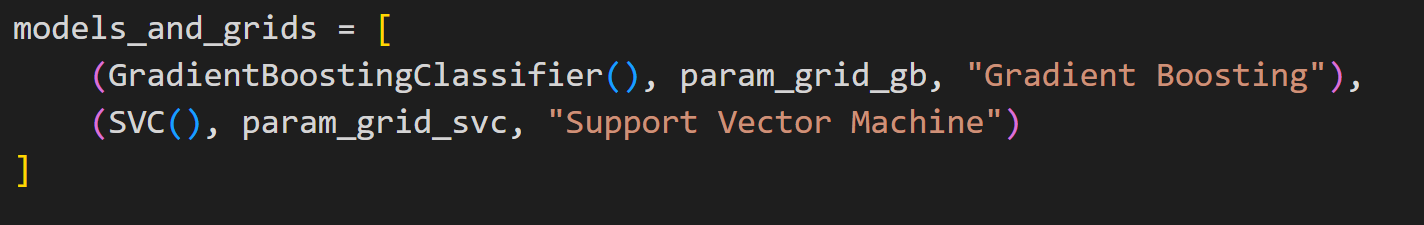

In [ ]:
models_and_grids = [
    (GradientBoostingClassifier(), param_gird_gradient_boosting, "Gradient Boosting"),
    (SVC(), param_gird_support_vector, "SVC")
]

In [ ]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best cross-validation accuracy for Gradient Boosting: 0.8301

Best parameters for SVC: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.8315


## 7.Reflection and Analysis
**Which model performed the best without tuning?**

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

  - The Support Vector Machine Classifier and Gradient Boosting Model had the highest accuracy scores before hyperparameter tuning.

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

  - Hyperparameter tuning improved the SVC and Gradient Boosting Model both saw improvements in their accuracy scores.

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

  - SVC saw about a 3 percentage point improvement in its accuracy score (just above 80% to just above 83%). The Gradient Boosting Model saw about a half percentage point in its accuracy score (just above 82.68% to just above 83%).  
  

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

  - The optimal parameters for the Gradient Boosting Classifier is a learning rate of 0.2, a max depth of 3, and 100 estimators. The only parameter that differs from the default ones is the learning rate.
  - The optimal parameters for the SVC model are the default parameters.

5. Did any model experience overfitting after tuning? Examine the training versus test accuracy for each of the top models after tuning. Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

  - The best model for deployment will be the Gradient Boosting Classifier. Both models had similar accuracy scores but the SVC Model tends to be more complex in terms of its computational requirements. So, I wouls deploy the Gradient Boosing Model.